<a href="https://colab.research.google.com/github/MaferLedmar/Actividad5_RegresionLinealSimple/blob/main/Actividad5_Codigo_Girona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
df = pd.read_csv('Girona_Clean.csv')
df = df.drop(columns='Unnamed: 0', axis = 1)
df.head()

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
0,100.0,90.0,42.0,293,6.0,4.94,4.91,4.63,0.37,Private room
1,100.0,95.9,47.0,282,6.0,4.85,4.91,4.69,0.51,Private room
2,100.0,80.0,74.0,315,6.0,4.31,4.76,4.74,0.62,Entire home/apt
3,100.0,91.0,45.0,248,9.0,4.50,5.00,4.63,0.08,Private room
4,94.4,95.9,120.0,0,11.0,4.82,4.73,4.91,0.09,Entire home/apt


In [25]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [26]:
df_hotel = df[df['room_type'] == 'Hotel room']
df_private = df[df['room_type'] == 'Private room']

In [27]:
Corr_Factors1 = df_hotel.corr()
Corr_Factors1 = abs(Corr_Factors1)
Corr_Factors2 = df_private.corr()
Corr_Factors2 = abs(Corr_Factors2)

<ipython-input-27-f056d3c04209>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1 = df_hotel.corr()
<ipython-input-27-f056d3c04209>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors2 = df_private.corr()


<Axes: >

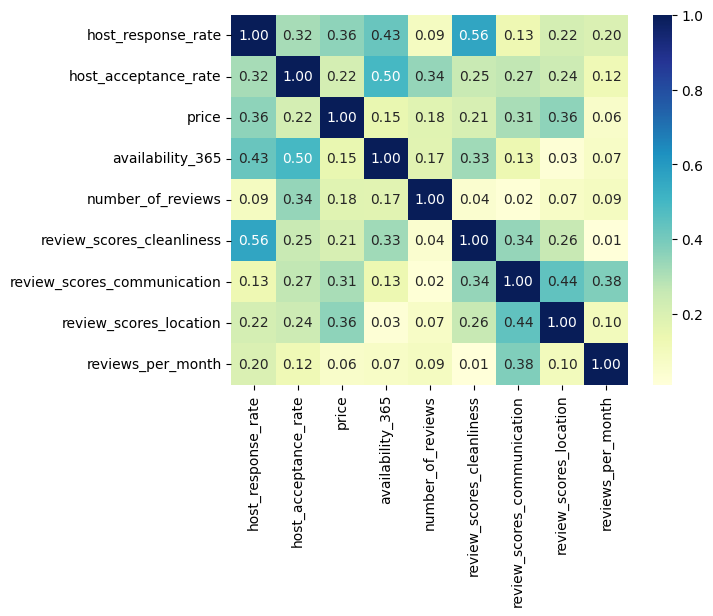

In [28]:
Heat_Map1 = sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot = True, fmt = '.2f')
Heat_Map1

<Axes: >

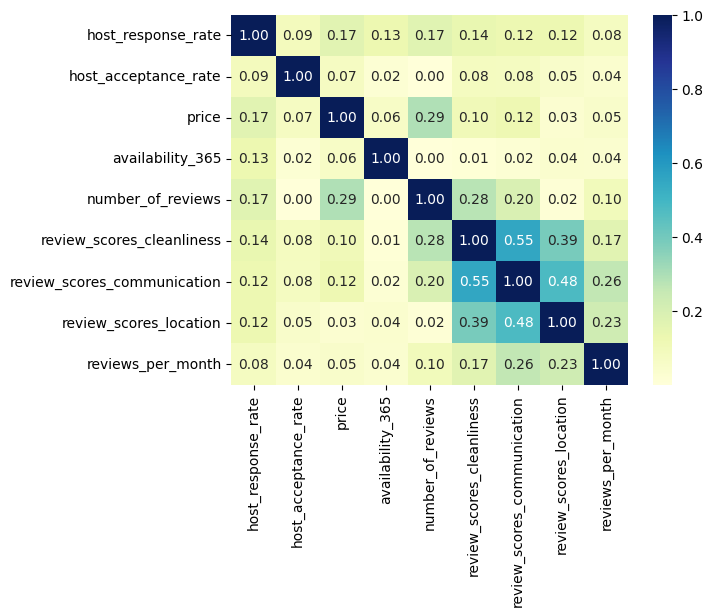

In [29]:
Heat_Map2 = sns.heatmap(Corr_Factors2, cmap = 'YlGnBu', annot = True, fmt = '.2f')
Heat_Map2

In [30]:
vars_Indep = df_hotel[['host_response_rate']]
var_Dep = df_hotel['review_scores_cleanliness']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = vars_Indep, y = var_Dep)

LinearRegression()

In [31]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.04161556]),
 'rank_': 1,
 'singular_': array([24.32323992]),
 'intercept_': 0.6116641087184318}

## **Modelo matemático: y = 0.04161556x + 0.6116641087184318**

In [32]:
y_pred = model.predict(X = df_hotel[['host_response_rate']])
len(y_pred)

50

In [33]:
df_hotel.insert(0, 'Predicciones', y_pred)
df_hotel

,Predicciones,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
1223,4.398680,91.0,99.0,103.0,121,12.0,4.17,4.50,4.80,0.13,Hotel room
1390,4.773221,100.0,100.0,300.0,338,6.0,4.59,4.86,4.93,0.40,Hotel room
1616,4.398680,91.0,99.0,88.0,133,10.0,4.50,4.70,4.70,0.12,Hotel room
1829,4.398680,91.0,99.0,80.0,139,28.0,4.54,4.93,4.75,0.34,Hotel room
2061,4.398680,91.0,99.0,76.0,124,11.0,4.73,4.91,4.91,0.13,Hotel room
2063,4.398680,91.0,99.0,116.0,90,15.0,4.33,4.67,4.73,0.21,Hotel room
2335,4.773221,100.0,100.0,113.0,319,6.0,4.89,4.90,4.76,0.40,Hotel room
3422,4.398680,91.0,99.0,83.0,139,4.0,4.75,5.00,4.80,0.06,Hotel room
3468,4.398680,91.0,99.0,119.0,75,23.0,4.26,4.78,4.70,0.33,Hotel room
3837,4.398680,91.0,99.0,114.0,139,2.0,4.00,5.00,4.50,0.06,Hotel room


<Axes: xlabel='host_response_rate', ylabel='review_scores_cleanliness'>

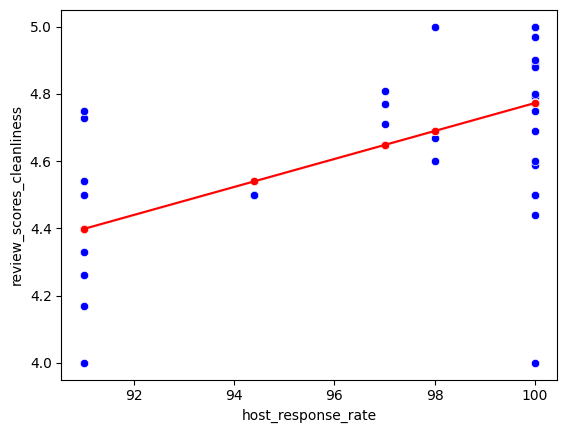

In [40]:
sns.scatterplot(x = 'host_response_rate', y = 'review_scores_cleanliness', color = 'blue', data = df_hotel)
sns.scatterplot(x = 'host_response_rate', y = 'Predicciones', color = 'red', data = df_hotel)
sns.lineplot(x = 'host_response_rate', y = 'Predicciones', color = 'red', data = df_hotel)

In [35]:
vars_Indep = df_private[['review_scores_communication']]
var_Dep = df_private['review_scores_cleanliness']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = vars_Indep, y = var_Dep)

LinearRegression()

In [36]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.90488406]),
 'rank_': 1,
 'singular_': array([5.36276345]),
 'intercept_': 0.3326195989316947}

## **Modelo matemático: y = 0.90488406x + 0.3326195989316947**

In [37]:
y_pred = model.predict(X = df_private[['review_scores_communication']])
y_pred

array([4.77560036, 4.77560036, 4.85703992, ..., 4.5855747 , 4.5855747 ,
       4.5855747 ])

In [38]:
df_private.insert(0, 'Predicciones', y_pred)
df_private

,Predicciones,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
0,4.775600,100.0,90.0,42.0,293,6.0,4.94,4.91,4.63,0.37,Private room
1,4.775600,100.0,95.9,47.0,282,6.0,4.85,4.91,4.69,0.51,Private room
3,4.857040,100.0,91.0,45.0,248,9.0,4.50,5.00,4.63,0.08,Private room
12,4.857040,100.0,91.0,49.0,247,10.0,4.50,5.00,4.70,0.09,Private room
13,4.694161,100.0,91.0,53.0,247,11.0,4.55,4.82,4.36,0.09,Private room
...,...,...,...,...,...,...,...,...,...,...,...
19534,4.585575,99.0,100.0,139.5,122,0.0,4.50,4.70,4.70,0.50,Private room
19535,4.585575,99.0,100.0,139.5,122,0.0,4.50,4.70,4.70,0.50,Private room
19546,4.585575,94.4,89.5,139.5,9,0.0,4.50,4.70,4.70,0.50,Private room
19573,4.585575,100.0,86.0,96.0,56,0.0,4.50,4.70,4.70,0.50,Private room


<Axes: xlabel='review_scores_communication', ylabel='review_scores_cleanliness'>

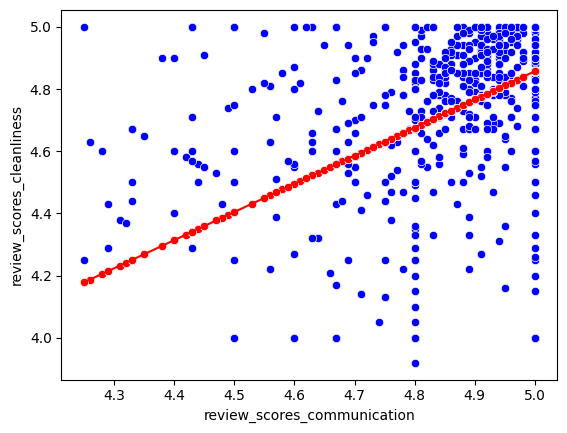

In [39]:
sns.scatterplot(x = 'review_scores_communication', y = 'review_scores_cleanliness', color = 'blue', data = df_private)
sns.scatterplot(x = 'review_scores_communication', y = 'Predicciones', color = 'red', data = df_private)
sns.lineplot(x = 'review_scores_communication', y = 'Predicciones', color = 'red', data = df_private)